2. 케라스(keras)

1) 케라스의 개요
① 파이썬으로 구현된 쉽고 간결한 딥러닝(deep learning) 라이브러리

② 구글의 엔지니어인 프랑소와 숄레(François Chollet)가 2015년 3월에 발표

③ 최근 버전 : 2022년 6월 현재 2.6.0

④ 내부적으로는 텐서플로우(tensorflow) 엔진이 구동되지만 직관적인 API로 쉽게 딥러닝 실험을 할 수 있도록 지원함

2) 케라스의 주요 특징
① 모듈화(Modularity) : 독립적인 모듈들을 조합하여 구현

② 최소주의(Minialism) : 각 모듈은 짧고 간결

③ 쉬운 확장성 : 클래스나 함수로 모듈을 쉽게 추가할 수 있음

④ 파이썬 기반 : 별도의 설정이 필요없음

3) 케라스를 이용한 실습 순서
① 데이터셋 생성

데이터로부터 학습용, 검증용 데이터셋 구분

딥러닝 모델의 학습 및 검증을 할 수 있도록 케라스에서 요구하는 형태로 변환을 해야 함

② 모델 구성

Sequence 모델을 생성한 후 필요한 Layer를 추가하여 구성

③ 모델 학습과정 설정

손실 함수 및 최적화 방법 정의

모델 컴파일

④ 모델 학습

학습용 데이터를 이용하여 모델 학습

⑤ 학습과정 출력

학습 시 학습용, 검증용 데이터셋의 손실 및 정확도 측정

⑥ 모델 평가

검증용 데이터셋으로 학습한 모델을 평가

⑦ 새로운 데이터 사용하여 값을 예측



1) 회귀분석 1

In [2]:
import numpy as np

np.random.seed(7)

#데이터 로딩, 시작36행은 건너뜀

data=np.genfromtxt("../data/regression/x09.txt",skip_header=36)

data[:10]

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.]])

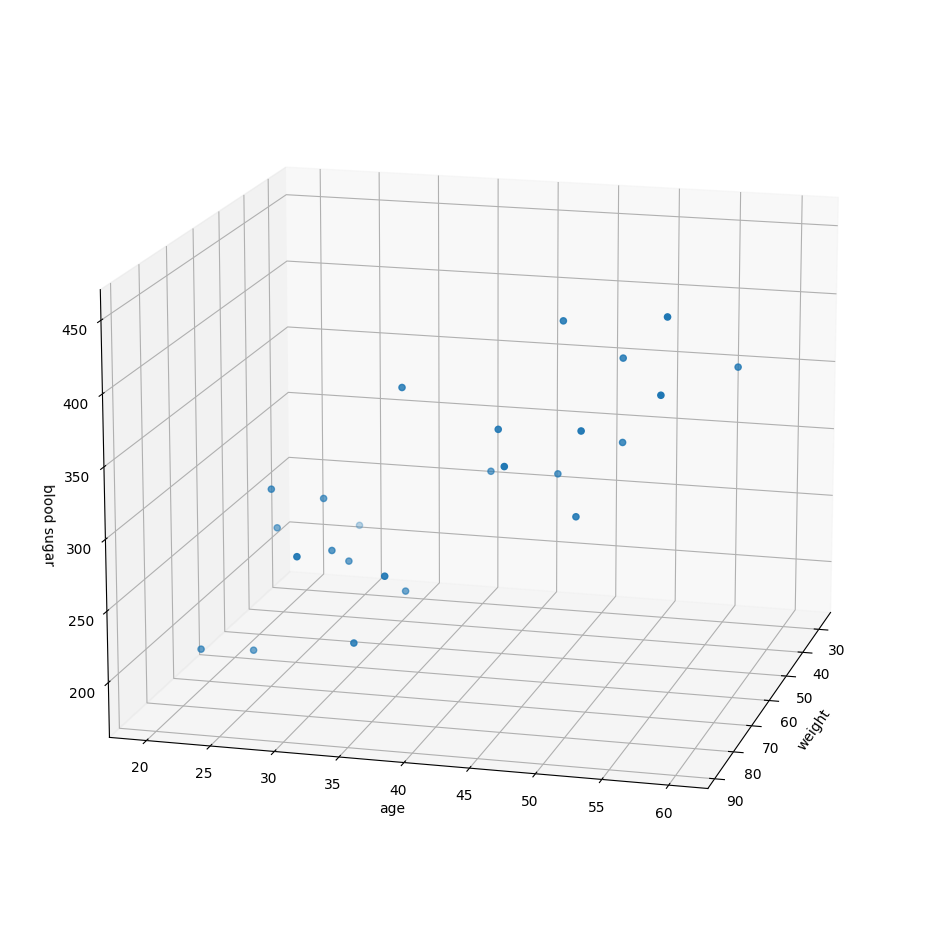

In [3]:
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

xdata=np.array(data[:,2],dtype=np.float32)

ydata=np.array(data[:,3],dtype=np.float32)

zdata=np.array(data[:,4],dtype=np.float32)

fig=plt.figure(figsize=(12,12))

ax=fig.add_subplot(111,projection='3d')

ax.scatter(xdata,ydata,zdata)

ax.set_xlabel("weight")

ax.set_ylabel("age")

ax.set_zlabel("blood sugar")

ax.view_init(15,15) #출력 각도 설정

plt.show()

In [4]:
from keras.models import Sequential

from keras.layers import Dense

from keras.optimizers import RMSprop

#데이터를 케라스에 맞게 변환

#독립변수

x_data=np.array(data[:,2:4],dtype=np.float32)

#종속변수

y_data=np.array(data[:,4],dtype=np.float32)

In [5]:
#회귀분석 모델 생성

model=Sequential()

model.add(Dense(1,input_shape=(2,)))

#손실함수 : 인공신경망에서 학습을 통해 최적의 가중치 매개변수를 결정하기 위한 기준으로 사용하는 함수(오차를 계산하는 함수)

#최적화함수 : 오차를 줄이기 위해 weight, bias 를 수정하는 함수

#손실함수의 결과값을 가장 작게 만드는 것이 신경망 학습의 목표

#손실함수의 결과값을 작게 만들기 위해 가중치 매개변수를 조절해가는 과정이 학습 과정

#평균제곱오차(Meam Squared Error, MSE), 회귀분석에서 많이 사용하는 손실함수

# https://keras.io/ko/optimizers/  옵티마이저 참조

rmsprop=RMSprop(learning_rate=0.01) #학습률 0.01

model.compile(loss='mse',optimizer=rmsprop)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [6]:
from keras.utils import plot_model  

plot_model(model,show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [7]:
hist=model.fit(x_data, y_data, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 1s 749ms/step - loss: 165644.0469
Epoch 2/1000
1/1 [==============================] - 0s 5ms/step - loss: 162841.8438
Epoch 3/1000
1/1 [==============================] - 0s 4ms/step - loss: 160832.5469
Epoch 4/1000
1/1 [==============================] - 0s 4ms/step - loss: 159164.0469
Epoch 5/1000
1/1 [==============================] - 0s 5ms/step - loss: 157693.1406
Epoch 6/1000
1/1 [==============================] - 0s 3ms/step - loss: 156353.3594
Epoch 7/1000
1/1 [==============================] - 0s 4ms/step - loss: 155107.8125
Epoch 8/1000
1/1 [==============================] - 0s 4ms/step - loss: 153933.4375
Epoch 9/1000
1/1 [==============================] - 0s 4ms/step - loss: 152814.9219
Epoch 10/1000
1/1 [==============================] - 0s 4ms/step - loss: 151741.3750
Epoch 11/1000
1/1 [==============================] - 0s 4ms/step - loss: 150704.8281
Epoch 12/1000
1/1 [==============================] - 0s 3ms/step - loss:

In [8]:
hist.history.keys()

dict_keys(['loss'])

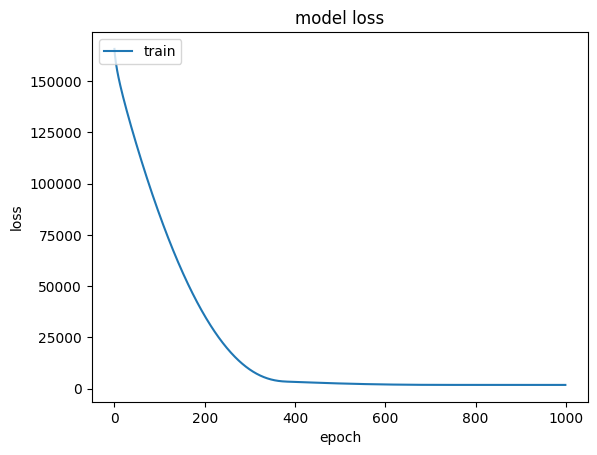

In [9]:
plt.plot(hist.history["loss"])

plt.title("model loss")

plt.ylabel("loss")

plt.xlabel("epoch")

plt.legend(["train"],loc="upper left")

plt.show()

In [10]:
#새로운 데이터로 예측

#체중 100kg, 40세

#1차원 배열을 1행 2열의 2차원 배열로 변환

model.predict(np.array([100,40]).reshape(1,2))

1/1 [==============================] - 0s 66ms/step


array([[350.5084]], dtype=float32)

In [11]:
#체중 60kg, 25세

model.predict(np.array([60,25]).reshape(1,2))

1/1 [==============================] - 0s 18ms/step


array([[219.6098]], dtype=float32)

In [12]:
#회귀선을 그리기 위한 작업

#가중치와 절편,편향(bias)

w, b =model.get_weights()

w, b

(array([[1.193698],
        [5.543377]], dtype=float32),
 array([9.403503], dtype=float32))

In [13]:
# linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)

# start부터 stop의 범위에서 num개를 균일한 간격으로 데이터를 생성하고 배열을 만드는 함수

x=np.linspace(20,100,50).reshape(50,1)

y=np.linspace(10,70,50).reshape(50,1)

x2=np.concatenate((x,y),axis=1) #x,y연결

#행렬곱셈

z=np.matmul(x2,w)+b

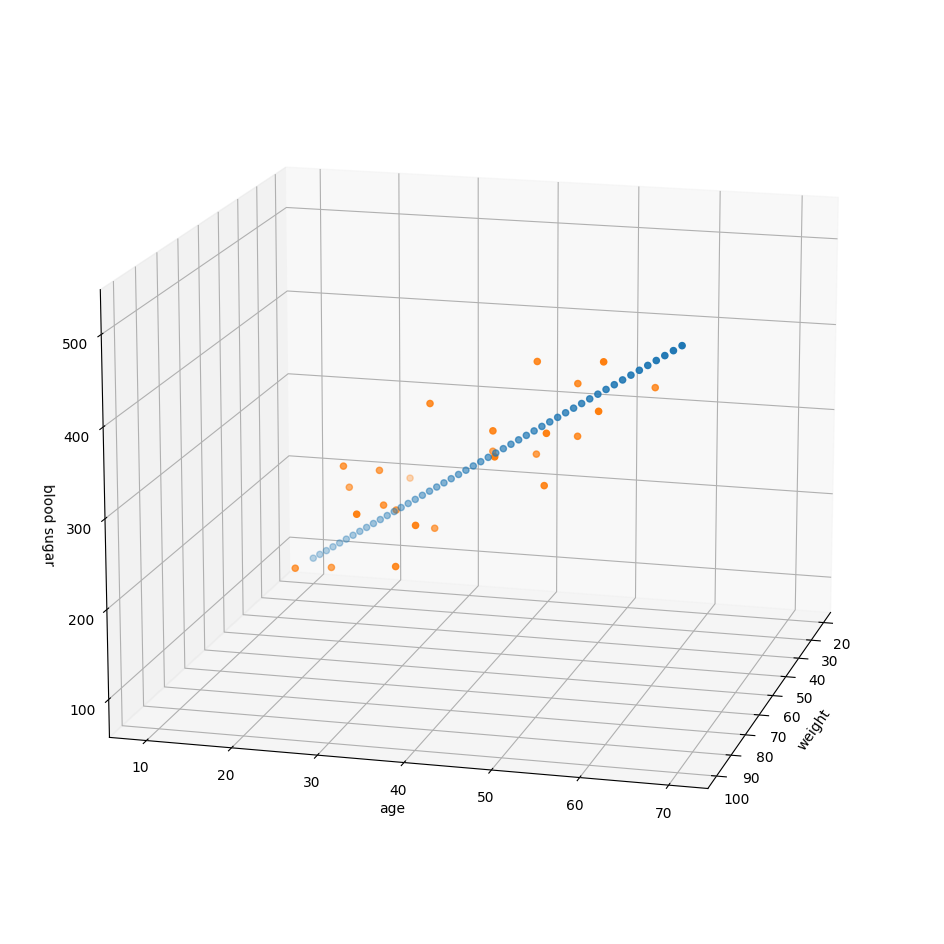

In [14]:
fig=plt.figure(figsize=(12,12))

ax=fig.add_subplot(111,projection='3d')

#회귀선

ax.scatter(x,y,z)

#산점도

ax.scatter(xdata,ydata,zdata)

ax.set_xlabel("weight")

ax.set_ylabel("age")

ax.set_zlabel("blood sugar")

ax.view_init(15,15)

plt.show()

In [15]:
from keras.utils import plot_model  

plot_model(model,show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [16]:
hist=model.fit(x_data, y_data, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 6ms/step - loss: 1845.7048
Epoch 2/1000
1/1 [==============================] - 0s 6ms/step - loss: 1845.6685
Epoch 3/1000
1/1 [==============================] - 0s 6ms/step - loss: 1845.6300
Epoch 4/1000
1/1 [==============================] - 0s 5ms/step - loss: 1845.5941
Epoch 5/1000
1/1 [==============================] - 0s 4ms/step - loss: 1845.5559
Epoch 6/1000
1/1 [==============================] - 0s 4ms/step - loss: 1845.5195
Epoch 7/1000
1/1 [==============================] - 0s 5ms/step - loss: 1845.4814
Epoch 8/1000
1/1 [==============================] - 0s 4ms/step - loss: 1845.4453
Epoch 9/1000
1/1 [==============================] - 0s 4ms/step - loss: 1845.4072
Epoch 10/1000
1/1 [==============================] - 0s 3ms/step - loss: 1845.3706
Epoch 11/1000
1/1 [==============================] - 0s 4ms/step - loss: 1845.3326
Epoch 12/1000
1/1 [==============================] - 0s 5ms/step - loss: 1845.2969
Epoch 13/1000

In [17]:
hist.history.keys()

dict_keys(['loss'])

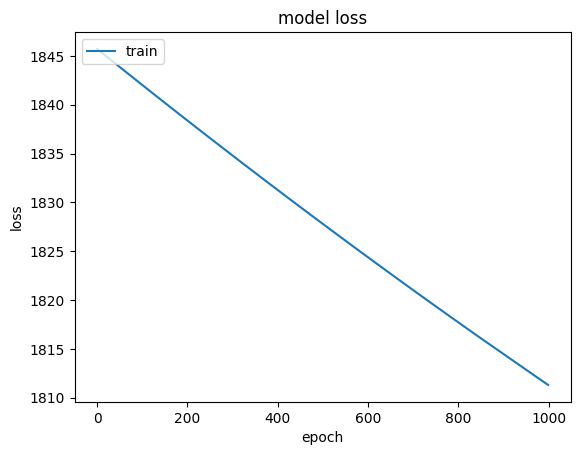

In [18]:
plt.plot(hist.history["loss"])

plt.title("model loss")

plt.ylabel("loss")

plt.xlabel("epoch")

plt.legend(["train"],loc="upper left")

plt.show()

In [19]:
#새로운 데이터로 예측

#체중 100kg, 40세

#1차원 배열을 1행 2열의 2차원 배열로 변환

model.predict(np.array([100,40]).reshape(1,2))

1/1 [==============================] - 0s 19ms/step


array([[347.3403]], dtype=float32)

In [20]:
#체중 60kg, 25세

model.predict(np.array([60,25]).reshape(1,2))

1/1 [==============================] - 0s 18ms/step


array([[221.47298]], dtype=float32)

In [21]:
#회귀선을 그리기 위한 작업

#가중치와 절편,편향(bias)

w, b =model.get_weights()

w, b

(array([[1.0852411],
        [5.4971795]], dtype=float32),
 array([18.92903], dtype=float32))

In [22]:
# linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)

# start부터 stop의 범위에서 num개를 균일한 간격으로 데이터를 생성하고 배열을 만드는 함수

x=np.linspace(20,100,50).reshape(50,1)

y=np.linspace(10,70,50).reshape(50,1)

x2=np.concatenate((x,y),axis=1) #x,y연결

#행렬곱셈

z=np.matmul(x2,w)+b

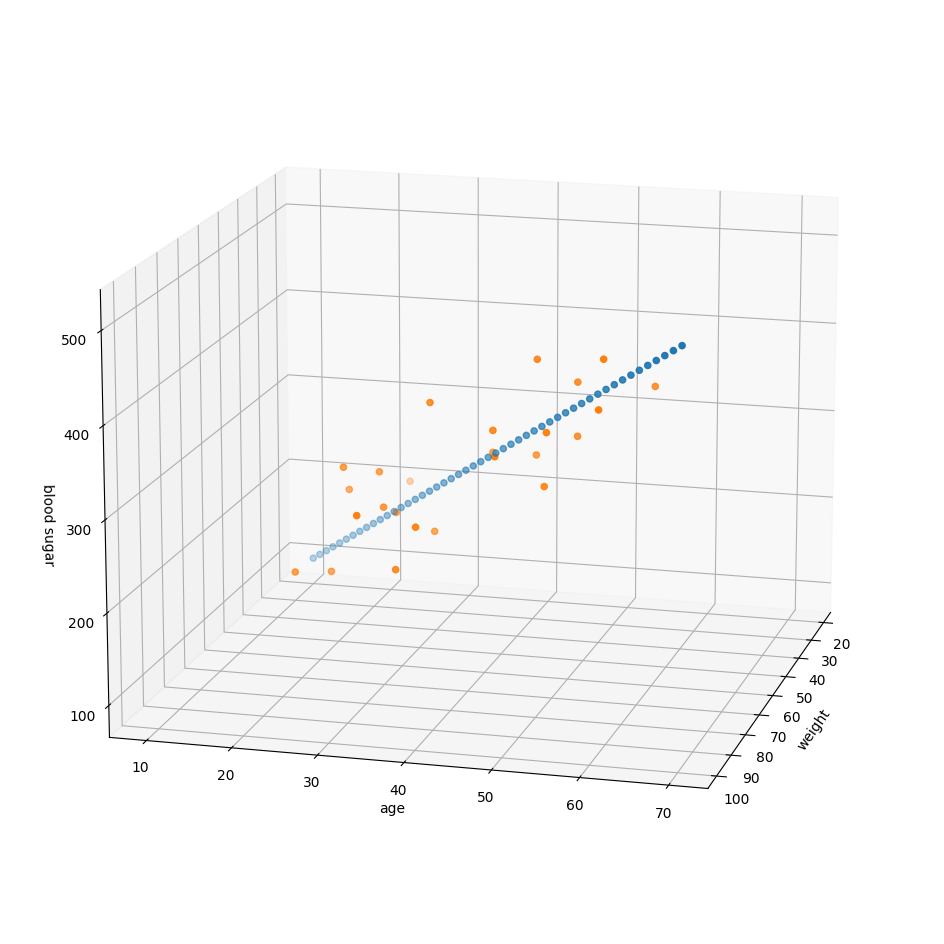

In [23]:
fig=plt.figure(figsize=(12,12))

ax=fig.add_subplot(111,projection='3d')

#회귀선

ax.scatter(x,y,z)

#산점도

ax.scatter(xdata,ydata,zdata)

ax.set_xlabel("weight")

ax.set_ylabel("age")

ax.set_zlabel("blood sugar")

ax.view_init(15,15)

plt.show()